In [1]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from itertools import product
from IPython.display import display, HTML
from fractions import Fraction
sns.set_context("paper")

# FHHPS Simulations

---

## Data-generating process


1. **Regressors** and **first-period random coefficients** are jointly normal
\begin{align}
    \begin{bmatrix}
        A_{1} \\ B_{1} \\ C_{1} \\ X_{1} \\ X_{2} \\ X_{3} \\ Z_{1} \\ Z_{2} \\ Z_3
    \end{bmatrix}
    \sim
    \mathcal{N}
    \left(
    \begin{bmatrix}
        2.0 \\
        0.4 \\
        0.4 \\
        0.0 \\
        0.0 \\
        0.0 \\
        0.0 \\
        0.0 \\
        0.0 \\
    \end{bmatrix}
    ,
    \begin{bmatrix}
    9.000 &  0.949 &  0.949 &  1.500 &  1.500 &  1.500 &  1.500 &  1.500 &  1.500 \\
    0.949 &  0.400 &  0.200 &  0.316 &  0.316 &  0.316 &  0.316 &  0.316 &  0.316 \\
    0.949 &  0.200 &  0.400 &  0.316 &  0.316 &  0.316 &  0.316 &  0.316 &  0.316 \\
    1.500 &  0.316 &  0.316 &  1.000 &  0.500 &  0.500 &  0.500 &  0.500 &  0.500 \\
    1.500 &  0.316 &  0.316 &  0.500 &  1.000 &  0.500 &  0.500 &  0.500 &  0.500 \\
    1.500 &  0.316 &  0.316 &  0.500 &  0.500 &  1.000 &  0.500 &  0.500 &  0.500 \\
    1.500 &  0.316 &  0.316 &  0.500 &  0.500 &  0.500 &  1.000 &  0.500 &  0.500 \\
    1.500 &  0.316 &  0.316 &  0.500 &  0.500 &  0.500 &  0.500 &  1.000 &  0.500 \\
    1.500 &  0.316 &  0.316 &  0.500 &  0.500 &  0.500 &  0.500 &  0.500 &  1.000 \\
    \end{bmatrix}
    \right)
\end{align}

The covariances are so that any pair of two random variables above has correlation $0.5$. 


2. **Random coefficient shocks** are also drawn from the normal distribution

\begin{align}
    \begin{bmatrix}
        U_{2} \\ V_{2} \\ W_{2} \\ U_{3} \\ V_{3} \\ W_{3}
    \end{bmatrix}
    \sim
    \mathcal{N}
    \left(
    \begin{bmatrix}
        0.3 \\
        0.3 \\
        0.1 \\
        0.1 \\
        0.1 \\
        0.1 \\
    \end{bmatrix}
    ,
    \begin{bmatrix}
    1.000 &  0.000 &  0.158 &  0.000 &  0.158 &  0.000 \\
    0.000 &  1.000 &  0.000 &  0.158 &  0.000 &  0.158 \\
    0.158 &  0.000 &  0.100 &  0.000 &  0.050 &  0.000 \\
    0.000 &  0.158 &  0.000 &  0.100 &  0.000 &  0.050 \\
    0.158 &  0.000 &  0.050 &  0.000 &  0.100 &  0.000 \\
    0.000 &  0.158 &  0.000 &  0.050 &  0.000 &  0.100 \\
    \end{bmatrix}
    \right)
\end{align}

3. **Second and third-period random coefficients** and **output** are as expected

\begin{align}
    A_{2} &= A_{1} + U_{2} \\
    A_{3} &= A_{2} + U_{3} \\
    B_{2} &= B_{1} + V_{2} \\
    B_{3} &= B_{2} + V_{3} \\
    C_{2} &= C_{1} + W_{2} \\
    C_{3} &= C_{2} + W_{3} \\
\end{align}

\begin{align}
    Y_{t} = A_{t} + B_{t}X_{t} + C_{t}Z_{t} 
\end{align}


----

## Tuning parameters

Please see Section 3.1 in the paper for more information about the tuning parameters below.



**Shocks moment parameter**

Shock first and second moments are estimated using local linear regressions. These use Gaussian product kernels with bandwidths equal to

\begin{align}
   h_{\Delta X_{t}, shock} &= \ Std(\Delta X_{t}) \times c_{shocks} \times  n^{-1/6} \\
   h_{\Delta Z_{t}, shock} &= \ Std(\Delta Z_{t}) \times c_{shocks} \times  n^{-1/6}
\end{align}

for some choice of proportionality constant $c_{shocks}$ (more on this below).

**Output conditional first moment parameters**

We estimate the first moments of the output $E[Y_{t} | X=x, Z=z]$ using local linear regressions endowed with a Gaussian or KNN kernel.

When using a Gaussian kernel, the bandwidths are

\begin{align}
   \gamma_{X_{t}, output1} &= \ Std(X_{t}) \times c_{output1\_step1} \times  n^{-1/10} \\
   \gamma_{Z_{t}, output1} &= \ Std(Z_{t}) \times c_{output1\_step1} \times  n^{-1/10}
\end{align}

When using a KNN kernel, the number of neighbors is selected as

\begin{align}
   n_{output1} &= \text{round} \left(n \times c_{output1\_step1} \times  n^{-1/10} \right) \\
\end{align}

The suffix "step1" is here because we may want to estimate these means again with a different bandwidth in the next step.

**Output conditional second moment parameters**

We estimate the centered second moments e.g., $Var[Y_{1} | X = x, Z = z]$ as follows:

+ Estimate $E[Y_{t} | X=x, Z=z]$ again using local linear regression, possibly using a different bandwith than in the previous step:

\begin{align}
   \gamma_{X_{t}, output1} &= \ Std(X_{t}) \times c_{output1\_step2} \times  n^{-1/10} \\
   \gamma_{Z_{t}, output1} &= \ Std(Z_{t}) \times c_{output1\_step2} \times  n^{-1/10}
\end{align}

+ Use these estimates to compute $\hat{\epsilon}_{t} := Y_{t} - \hat{E}[Y_{t} | X=x, Z=z]$ and estimate $E[\hat{e_{t}}^2 |  X = x, Z = z ]$. This second step is also done via local linear regression endowed with Gaussian or KNN kernels. As before, the bandwidths are set to

\begin{align}
   \gamma_{X_{t}, output2} &= \ Std(X_{t}) \times c_{output2} \times  n^{-1/10} \\
   \gamma_{Z_{t}, output2} &= \ Std(Z_{t}) \times c_{output2} \times  n^{-1/10}
\end{align}

if using a Gaussian kernel, or 

\begin{align}
   n_{output1} &= \text{round} \left(n \times c_{output2} \times  n^{-1/10} \right) \\
\end{align}

if using a KNN kernel. The parameter $c_{output2}$ is chosen independently of each other and of the previous choice of tuning parameters.

**Censoring**

The "censoring" parameters $\delta_{n}$ are selected as follows.

\begin{align}
    \delta_{censor1} = c_{censor1} \times n^{-1/5} \\
    \delta_{censor2} = c_{censor2} \times n^{-1/5} \\
\end{align}

in the results below we let $c_{censor1} = c_{censor2} = 1$.



---

## Simulation results

Reading in results

In [14]:
filenames = glob("/Users/vitorh/Documents/fhhps/scripts/script_out/*69ead*.bz2")

In [15]:
df = []
for k, filename in enumerate(filenames):
    try:
        df_tmp = pd.read_csv(filename, header=None)
        df.append(df_tmp)
    except Exception as e:
        print(f"Could not read {filename} due to error", e)

In [16]:
df = pd.concat(df, axis=0, sort=False)

In [17]:
df.columns = ['n', 'kernel', 'output_bw1_const_step1', 'output_bw1_const_step2',  'output_bw2_const',
       'output_bw1_alpha', 'output_bw2_alpha', 'shock_bw1_const',
       'shock_bw2_const', 'shock_bw1_alpha', 'shock_bw2_alpha', 'mean_valid',
       'cov_valid',"time", 'name', 'value', ]

---

## Results

In what follows we show how our results change as the tuning parameters change. We use the following grid.

+ $c_{shocks} \in \{ .01, .05, .1 \}$
+ $c_{output1\_step1} \in \{0.01, 0.05, .1, .15\}$
+ $c_{output1\_step2} \in \{0.01, 0.05, .1, .15\}$
+ $c_{output2} \in \{0.01, 0.05, .1, .15\}$
+ $c_{censor1} = 1$
+ $c_{censor2} = 1$
+ kernel: KNN

In [27]:
param_names = ["shock_bw1_const", "output_bw1_const_step1", "output_bw1_const_step2", "output_bw2_const"]
pretty_param_names = ["$c_{shock}$", "$c_{output1\_step1}$", "$c_{output1\_step2}$", "$c_{output2}$"]

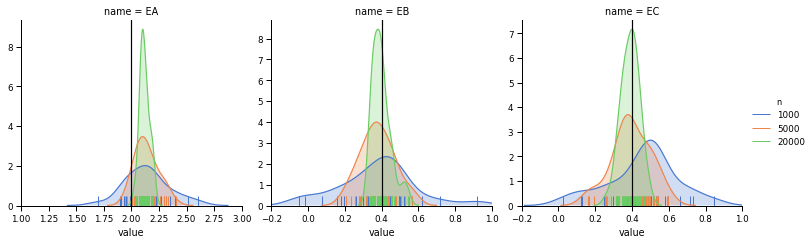

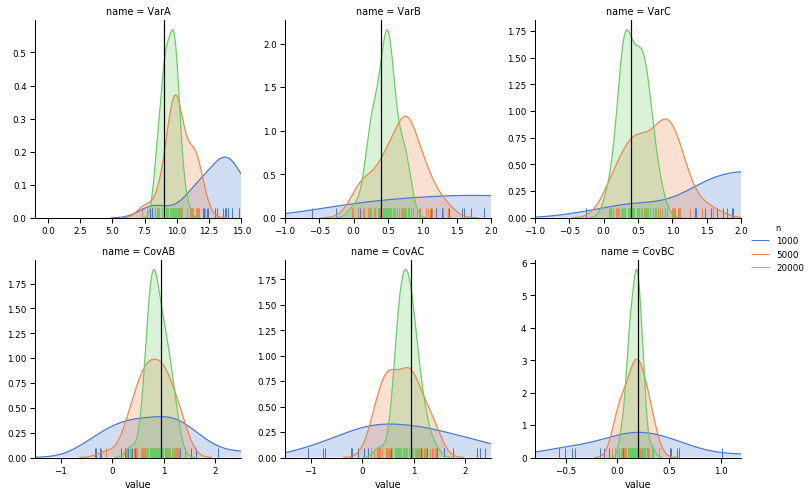

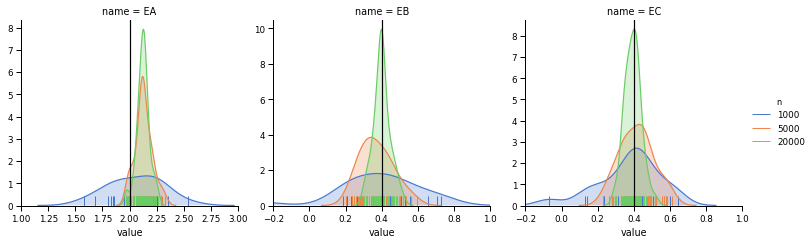

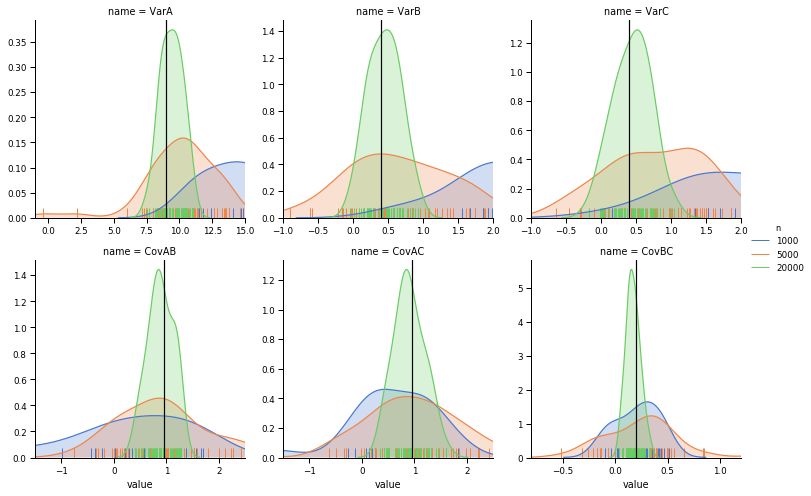

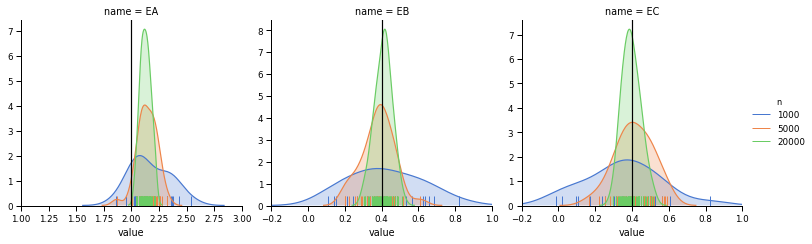

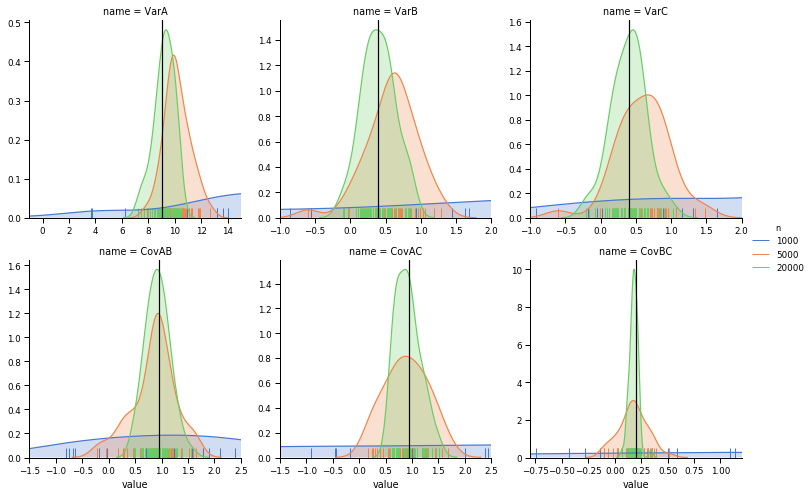

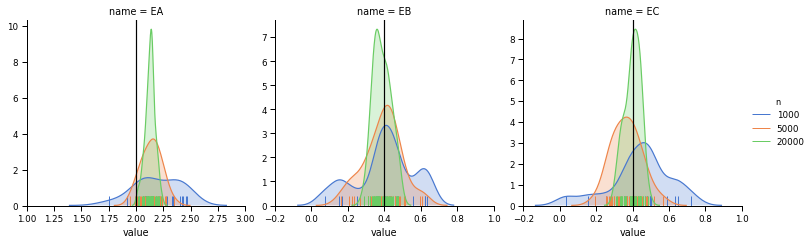

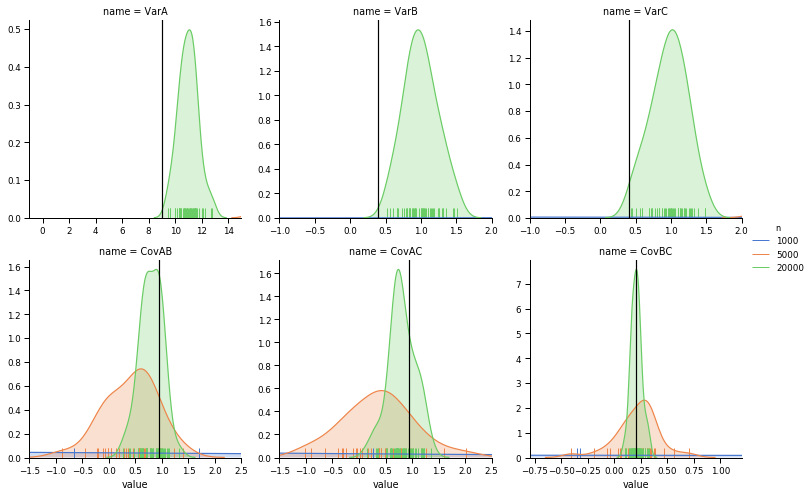

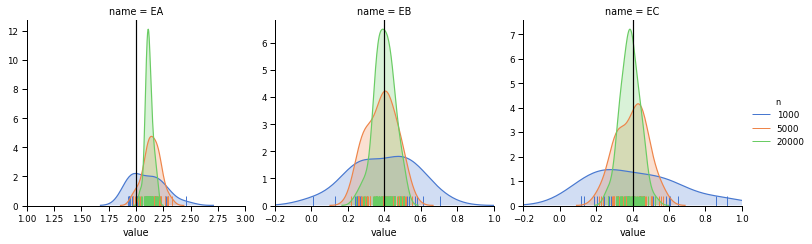

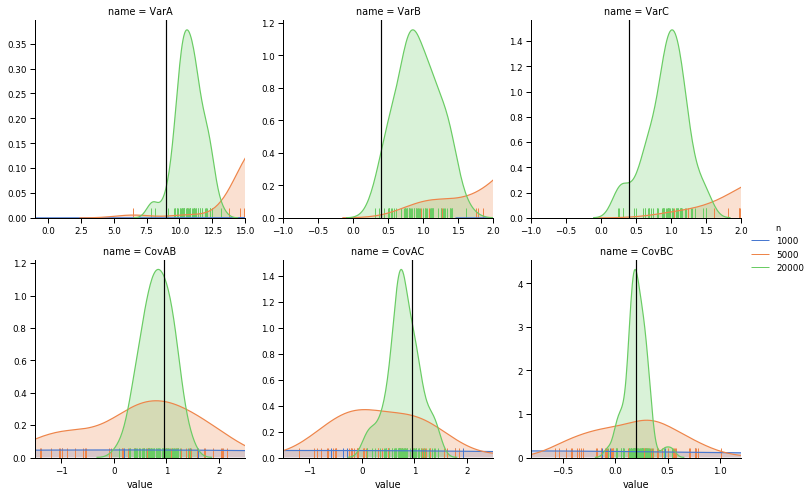

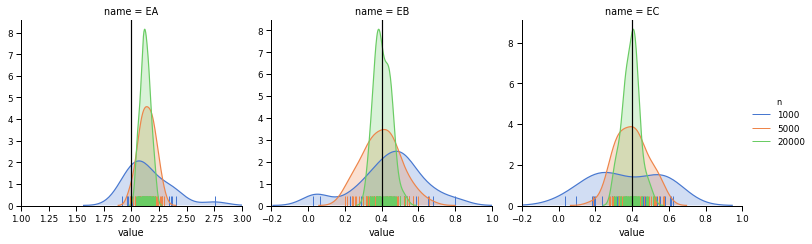

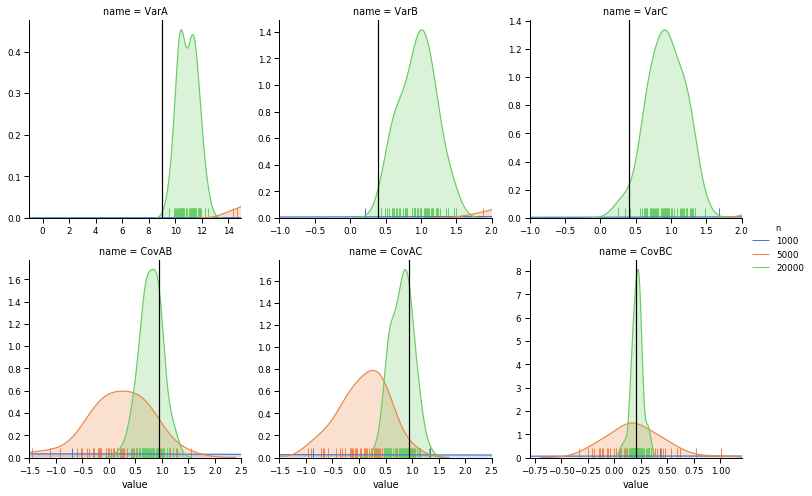

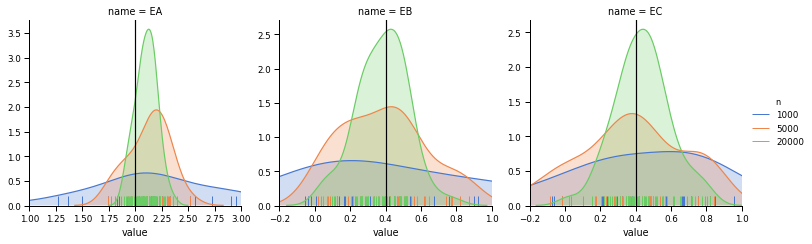

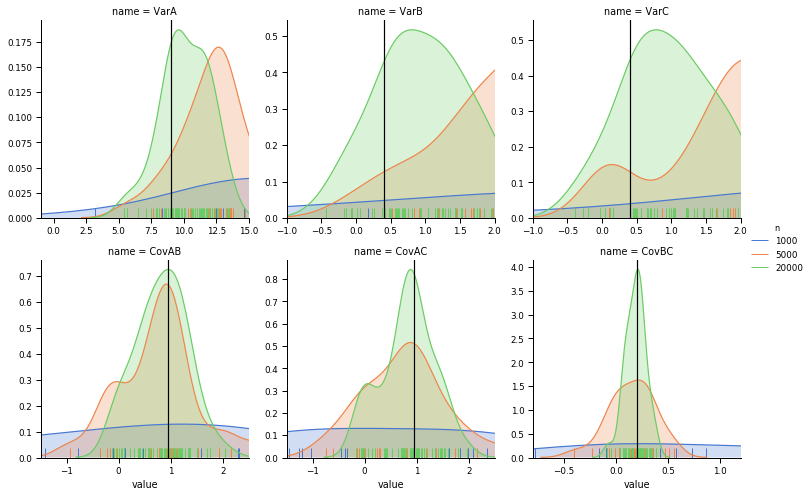

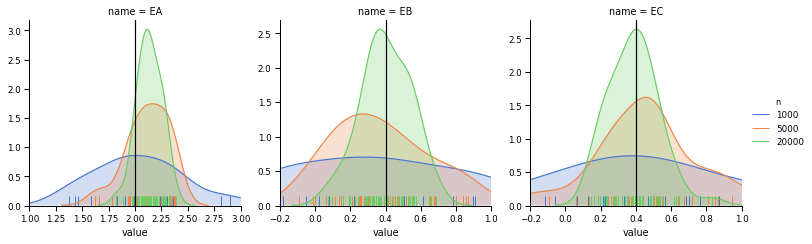

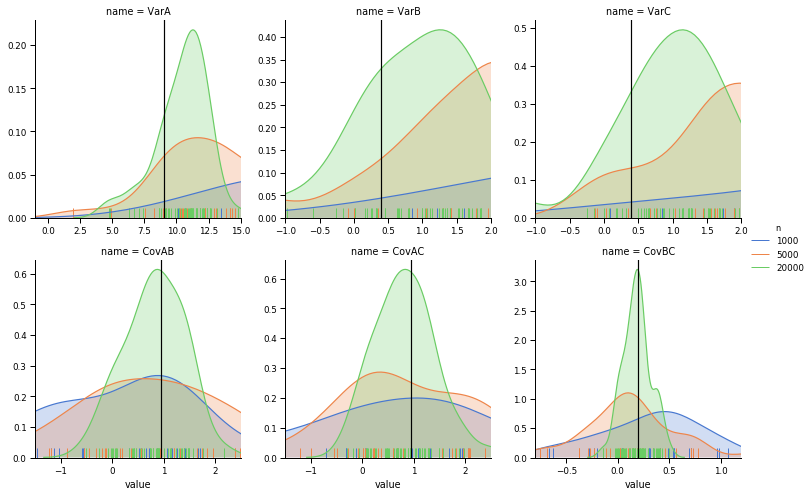

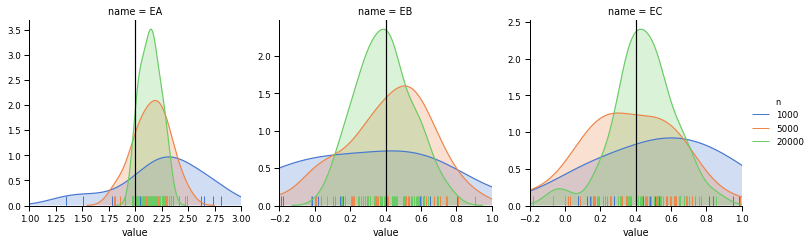

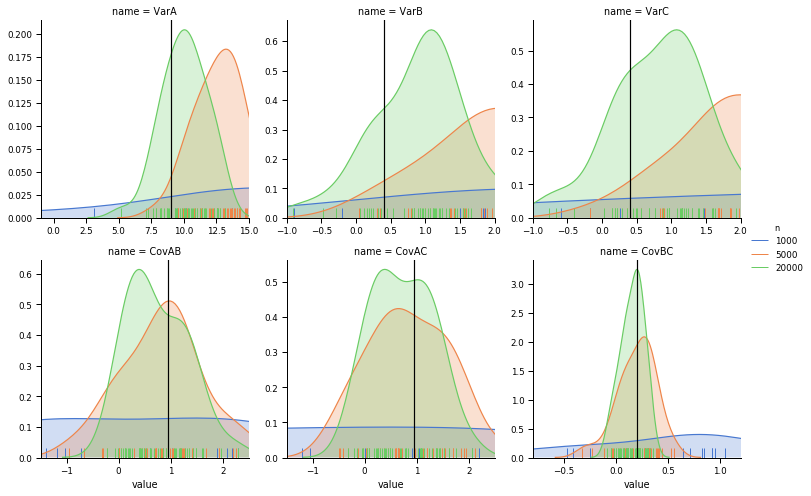

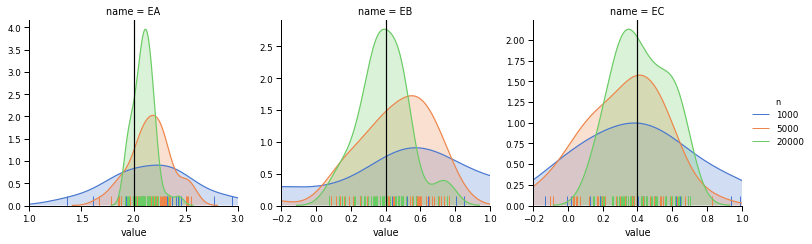

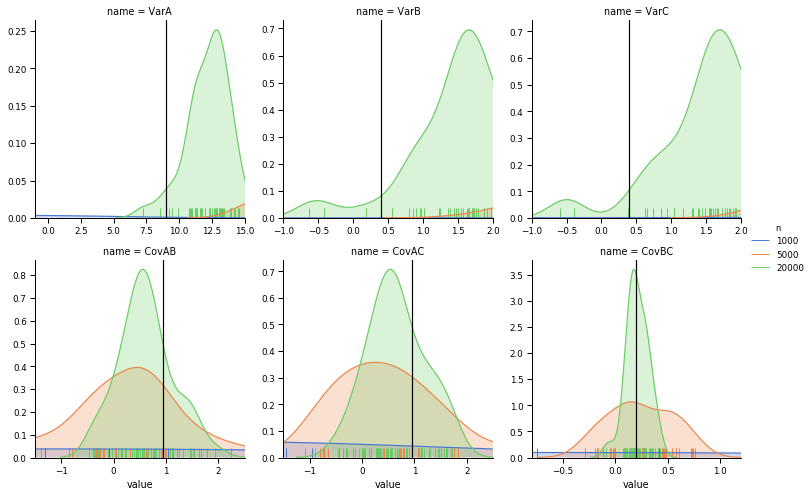

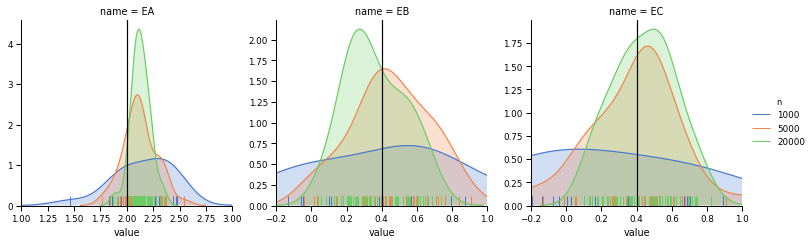

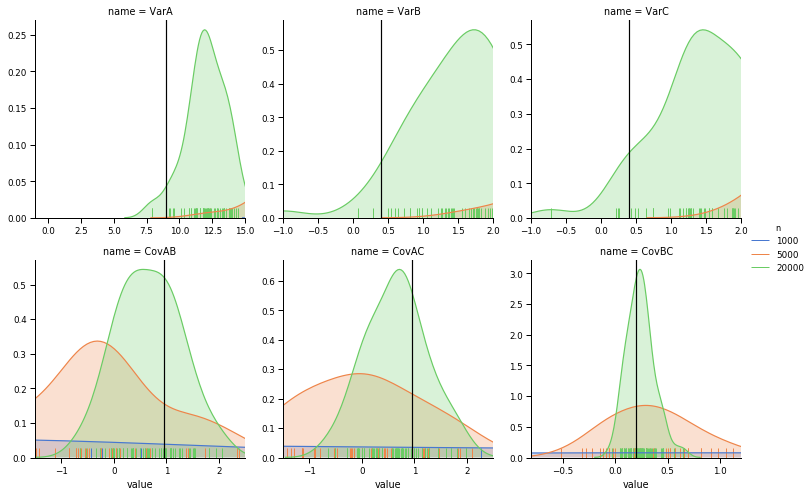

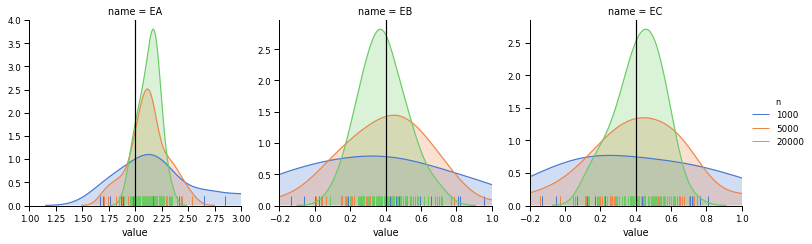

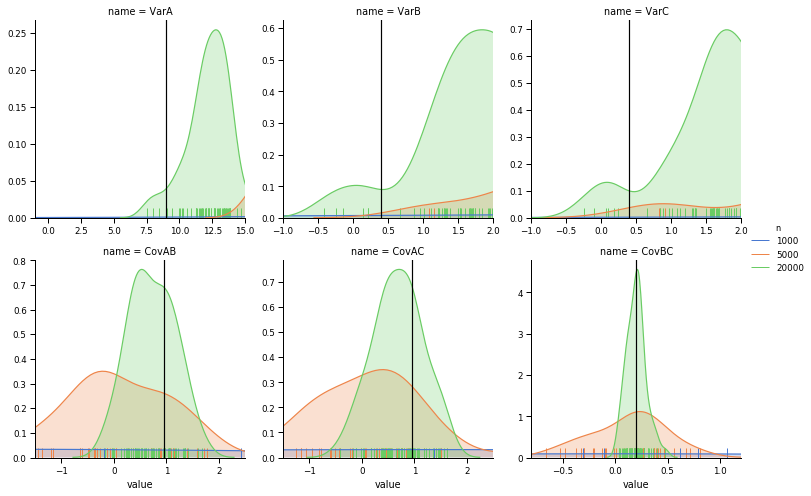

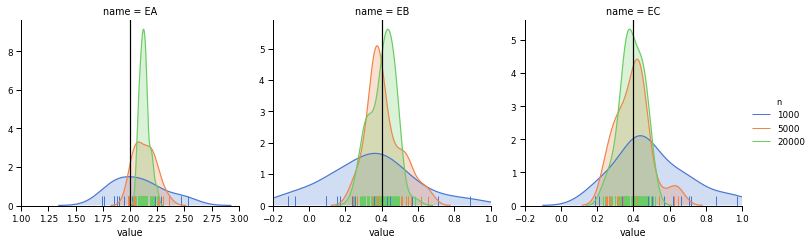

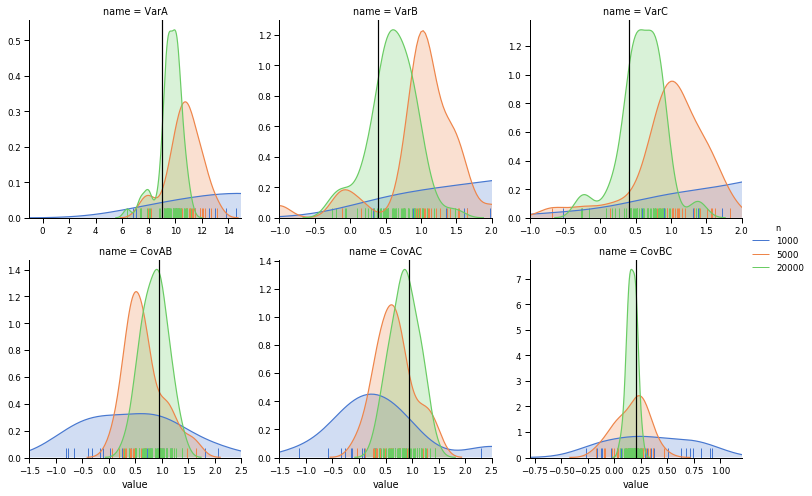

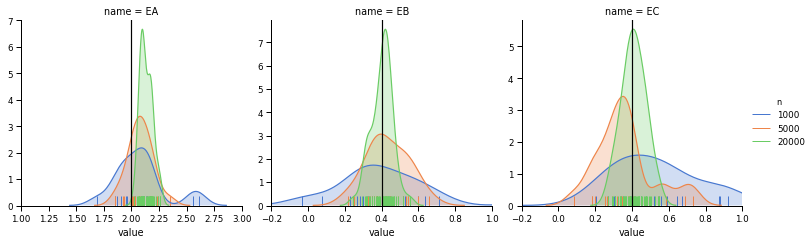

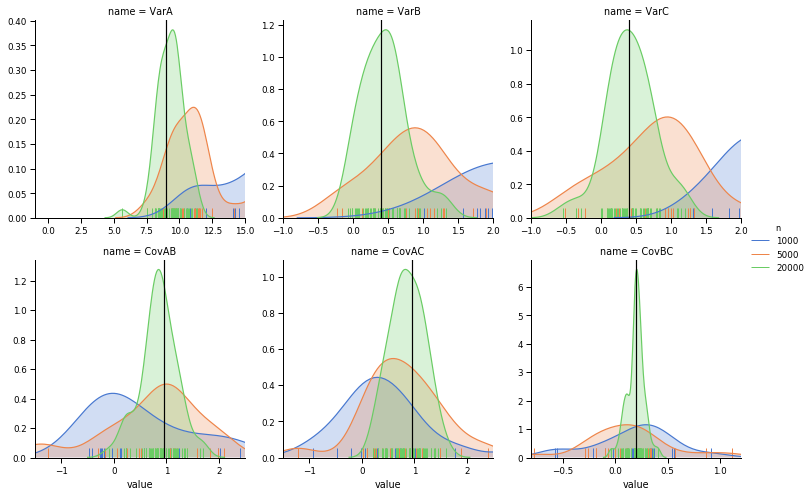

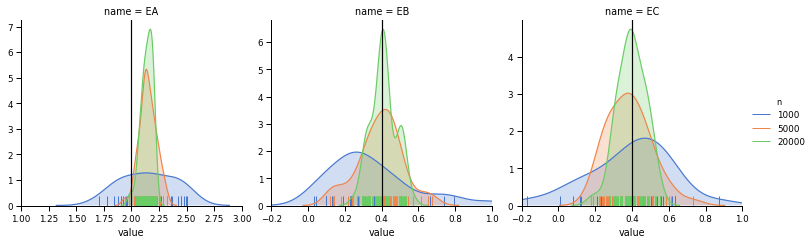

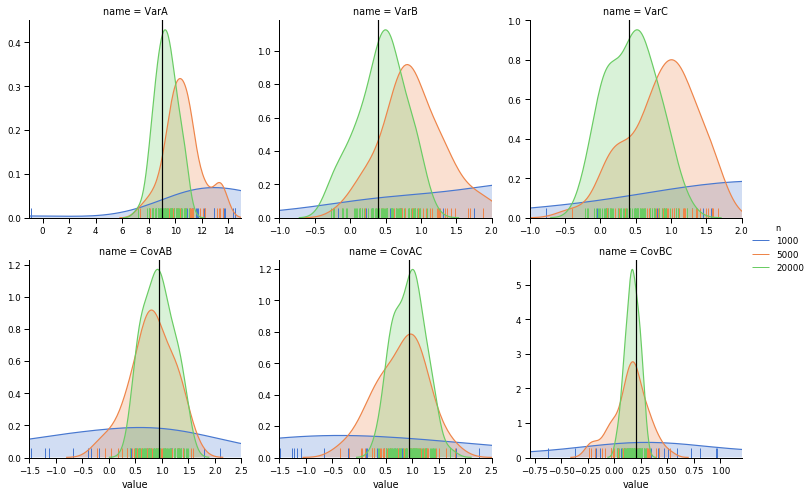

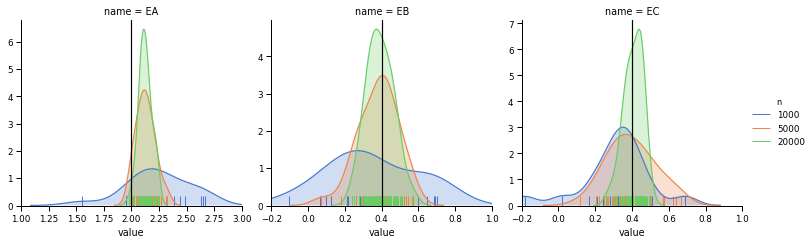

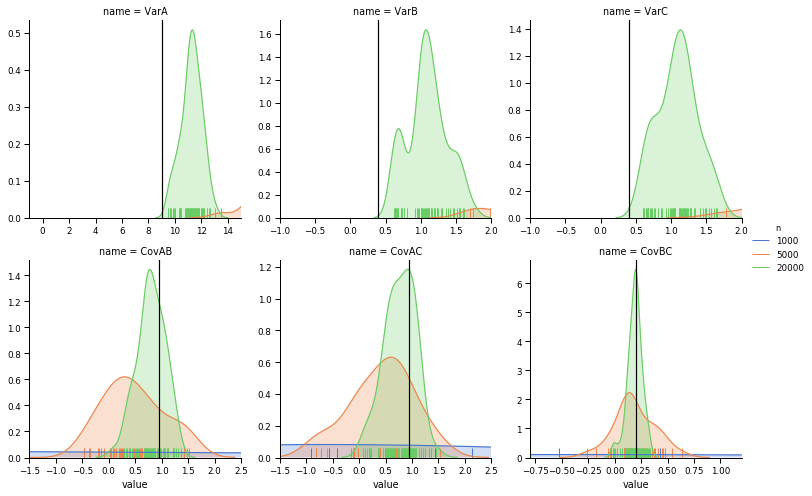

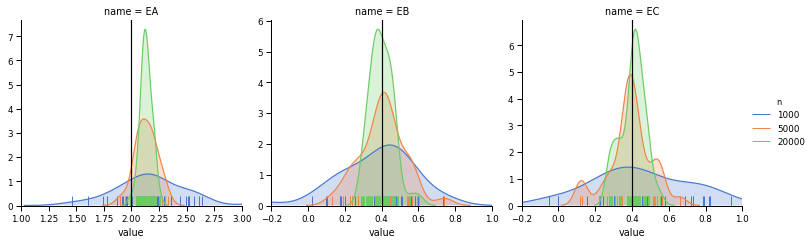

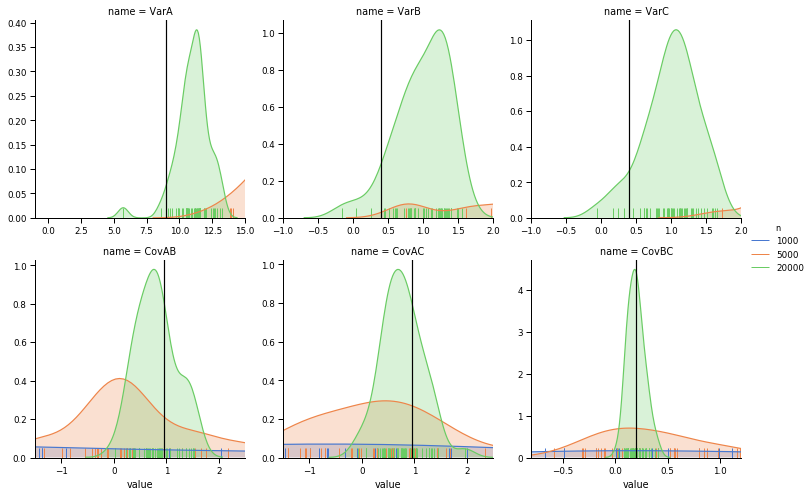

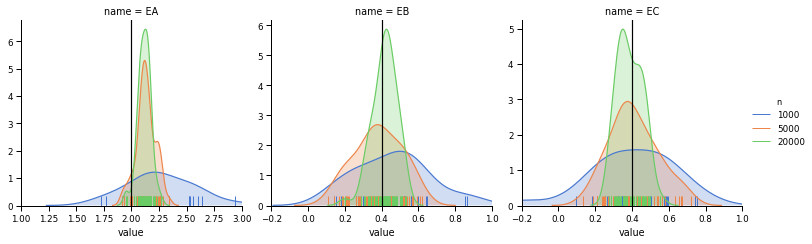

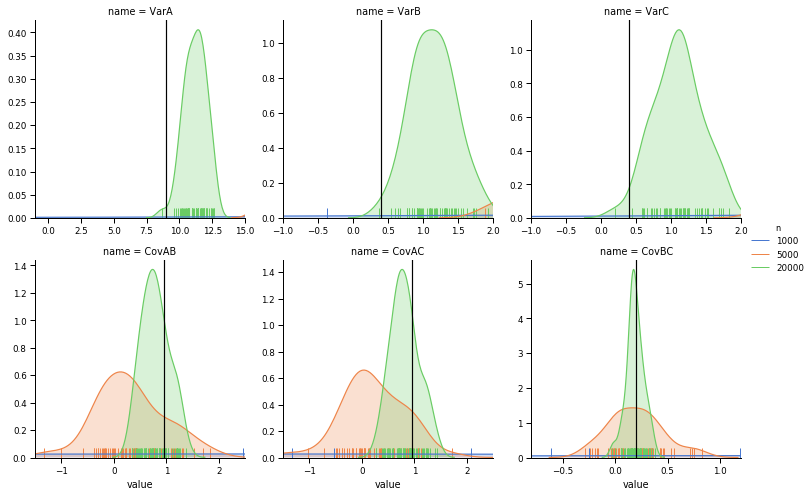

In [28]:
for param_values, df_grp in df.groupby(param_names):
    
    if float(Fraction(param_values[1])) < 0.1:
        continue

    title = "  ".join(f"{a}:$\\frac{{{b[0]}}}{{{b[2:]}}}$ &nbsp;&nbsp;" for a,b in zip(pretty_param_names, param_values))
    display(HTML(f"<h2>{title}</h2>"))
    

    g = sns.FacetGrid(data=df_grp.query("name == @mean_names"), palette="muted",
                      hue="n",
                      hue_order=[1000, 5000, 20000],
                      col="name", sharey=False, sharex=False, height=3.5)
    g.map(sns.kdeplot, "value", shade=True)
    g.map(sns.rugplot, "value")
    g.add_legend()
    [g.axes.flat[k].set_xlim(lim) for k, lim in enumerate(mean_xlims)]
    [g.axes.flat[k].axvline(m, color="black") for k, m in enumerate(mean_truth)]
    plt.show()

    g = sns.FacetGrid(data=df_grp.query("name == @cov_names"), 
                      hue="n", col="name", palette="muted",
                      hue_order=[1000, 5000, 20000],
                      sharey=False, sharex=False, height=3.5, col_wrap=3)
    g.map(sns.kdeplot, "value", shade=True)
    g.map(sns.rugplot, "value")
    g.add_legend()
    [g.axes.flat[k].set_xlim(lim) for k, lim in enumerate(cov_xlims)]
    [g.axes.flat[k].axvline(m, color="black") for k, m in enumerate(cov_truth)]
    plt.show()
